# Chnapter 3: Classification

## Downloading Dataset

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)

In [2]:
X, y = mnist.data, mnist.target

print(X)
print(f"\ny = {y}")

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

y = ['5' '0' '4' ... '4' '5' '6']


In [3]:
print(X.shape)

(70000, 784)


In [4]:
y.shape

(70000,)

#### Let's view one image

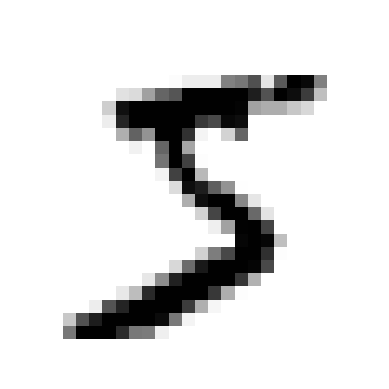

In [5]:
import matplotlib.pyplot as plt

some_digit = X[0]

image = some_digit.reshape(28, 28)
plt.imshow(image, cmap="binary")
plt.axis("off")
plt.show()

#### Let's see it's value

In [7]:
y[0]

'5'

## Create Test-Train Set

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a Binary Classifier

In [10]:
y_train_5 = (y_train == "5")
y_test_5 = (y_test == "5")

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])

array([ True])

**Let's try another binary classifier**
(not in book)

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train_5)

rf_clf.predict([some_digit])

array([ True])

### Performance Measures

1. Measuring Accuracy Using Cross-Validation

In [15]:
from sklearn.model_selection import cross_val_score

sgd_result = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
rf_result = cross_val_score(rf_clf, X_train, y_train_5, cv=3, scoring="accuracy")

print(sgd_result)
print(rf_result)

[0.95035 0.96035 0.9604 ]
[0.98885 0.9863  0.98635]


2. Checking using a Dummy Classifier

In [16]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [17]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

3. Confusion Matrices

In [18]:
from sklearn.model_selection import cross_val_predict

sgd_y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
rf_y_train_pred = cross_val_predict(rf_clf, X_train, y_train_5, cv=3)

In [24]:
from sklearn.metrics import confusion_matrix

sgd_cm = confusion_matrix(y_train_5, sgd_y_train_pred)
rf_cm = confusion_matrix(y_train_5, rf_y_train_pred)
print(f"SGD:\n{sgd_cm}")
print()
print(f"RF:\n{rf_cm}")

SGD:
[[53892   687]
 [ 1891  3530]]

RF:
[[54534    45]
 [  725  4696]]


> Precision: TP/(TP+FP)  
> Recall: TP/(TP+FN)

In [25]:
from sklearn.metrics import precision_score, recall_score

sgd_ps = precision_score(y_train_5, sgd_y_train_pred)
rf_ps = precision_score(y_train_5, rf_y_train_pred)

print(f"SGD Precision Score = {sgd_ps}\n")
print(f"RF Precision Score = {rf_ps}")

SGD Precision Score = 0.8370879772350012

RF Precision Score = 0.9905083315756169


In [27]:
sgd_rs = recall_score(y_train_5, sgd_y_train_pred)
rf_rs = recall_score(y_train_5, rf_y_train_pred)

print(f"SGD Recall Score = {sgd_rs}\n")
print(f"RF Recall Score = {rf_rs}")

SGD Recall Score = 0.6511713705958311

RF Recall Score = 0.8662608374838591


> F1 = 2 × (Precision × Recall) / (Precision + Recall)

In [28]:
from sklearn.metrics import f1_score

sgd_f1_score = f1_score(y_train_5, sgd_y_train_pred)
rf_f1_score = f1_score(y_train_5, rf_y_train_pred)

print(f"SGD F1 Score: {sgd_f1_score}\n")
print(f"RF F1 Score: {rf_f1_score}")

SGD F1 Score: 0.7325171197343847

RF F1 Score: 0.9242275142688448


## How to get correct threshold ?

In [31]:
sgd_y_score = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

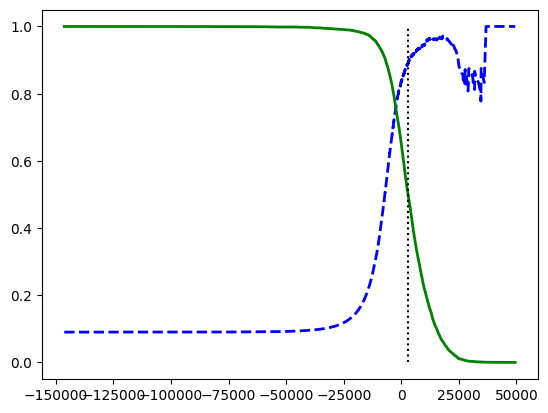

In [36]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, sgd_y_score)

threshold = 3000

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

**Ploting Precisions against Recall**

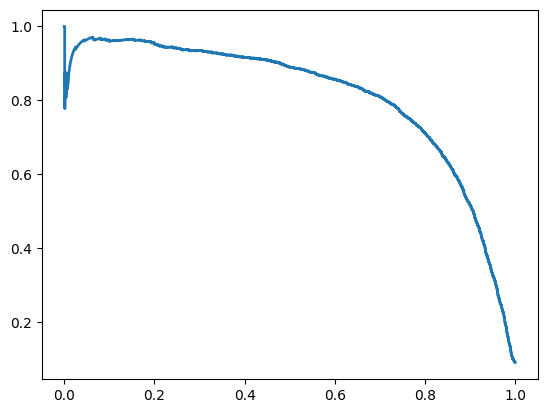

In [37]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.show()

In [39]:
#  Finding Correct threshold
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]

print(threshold_for_90_precision)

3370.0194991439557
